<a href="https://colab.research.google.com/github/matlarakshan/Almabetter_Projects/blob/main/Clustring_ShoppingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [85]:
# Load Dataset
shopping_data = pd.read_csv("/content/shopping_data.csv")

In [86]:
# 1st five rows
shopping_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [87]:
# last five rows
shopping_data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [88]:
# Dataset Rows & Columns count
shopping_data.shape

(200, 5)

In [89]:
# Dataset Info
shopping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [90]:
# Dataset Duplicate Value Count
shopping_data.duplicated().sum()

0

In [91]:
# Missing Values/Null Values Count
shopping_data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [92]:
shopping_data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [93]:
# Dataset Describe
shopping_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [94]:
# It describes the attribute with object datatype
shopping_data.describe(include=["object"])

,Genre
count,200
unique,2
top,Female
freq,112


In [95]:
# Check Unique Values for each variable.
shopping_data.nunique()

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [96]:
#To show the data types
shopping_data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

<Axes: >

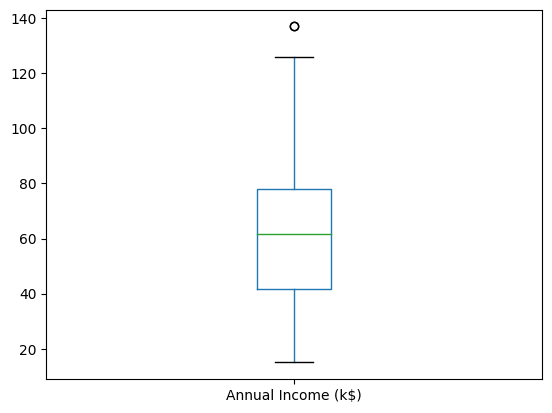

In [97]:
# Chart - 1 visualization code
shopping_data.boxplot(column =['Annual Income (k$)'], grid = False)

<Axes: >

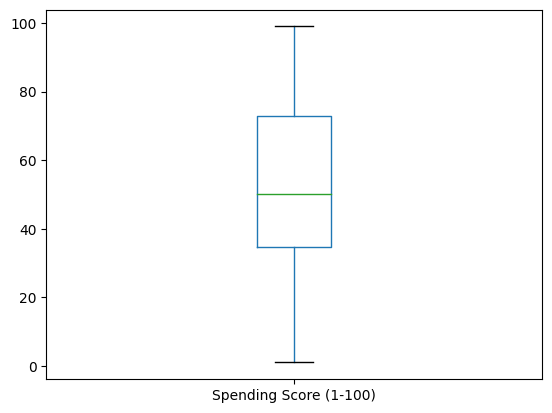

In [98]:
# Chart - 2 visualization code
shopping_data.boxplot(column =['Spending Score (1-100)'], grid = False)

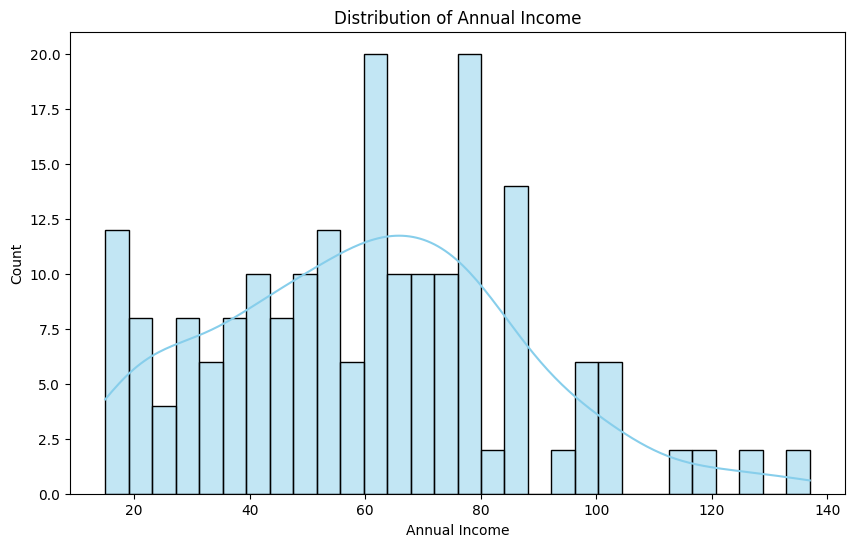

In [99]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(shopping_data['Annual Income (k$)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

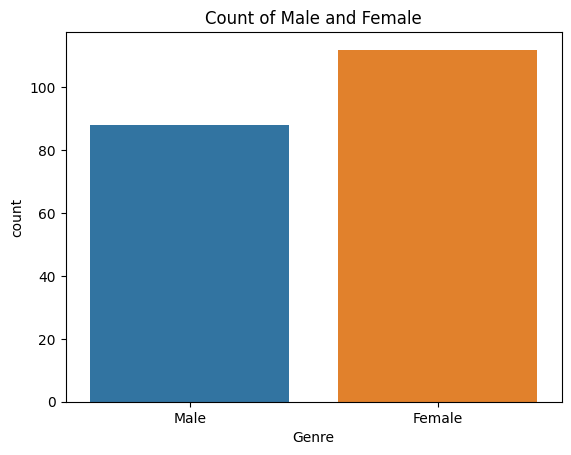

In [100]:
# Chart - 4 visualization code
# Countplot for 'type' column
sns.countplot(x='Genre', data=shopping_data)
plt.title('Count of Male and Female')
plt.show()


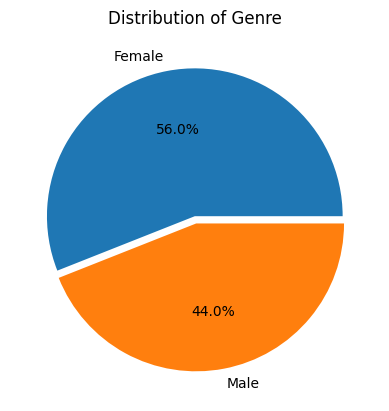

In [101]:
# Chart - 5 visualization code
# Pie chart for 'Genre' distribution
Genre_counts = shopping_data['Genre'].value_counts()
plt.pie(Genre_counts, labels=Genre_counts.index, autopct='%1.1f%%', explode=[0, 0.05])
plt.title('Distribution of Genre')
plt.show()

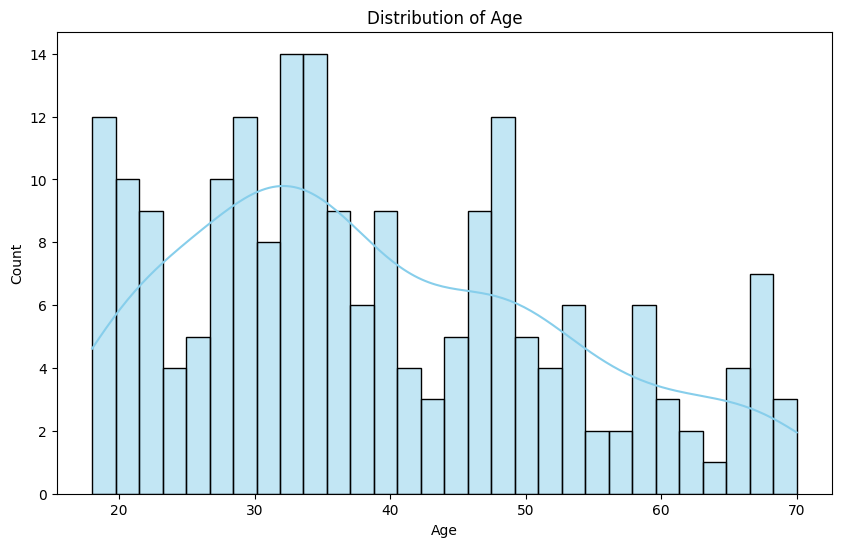

In [102]:
# Chart - 6 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(shopping_data['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

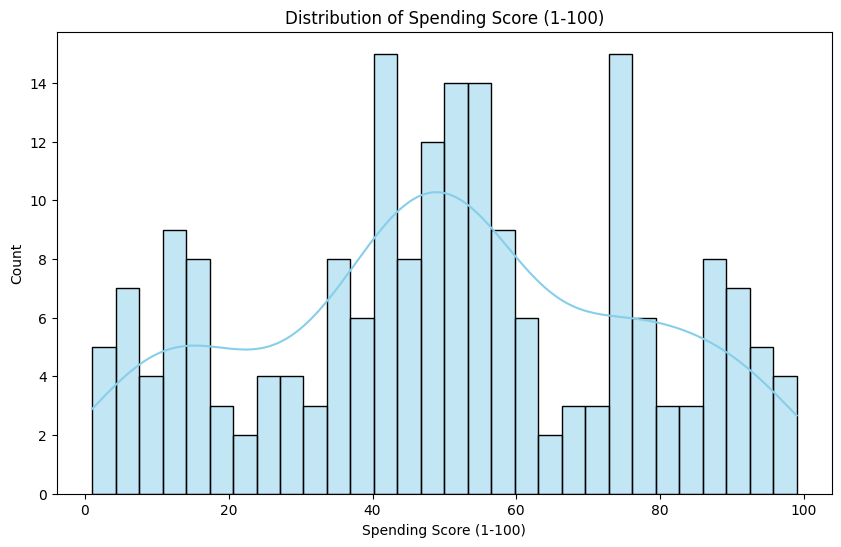

In [103]:
# Chart - 7 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(shopping_data['Spending Score (1-100)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.show()

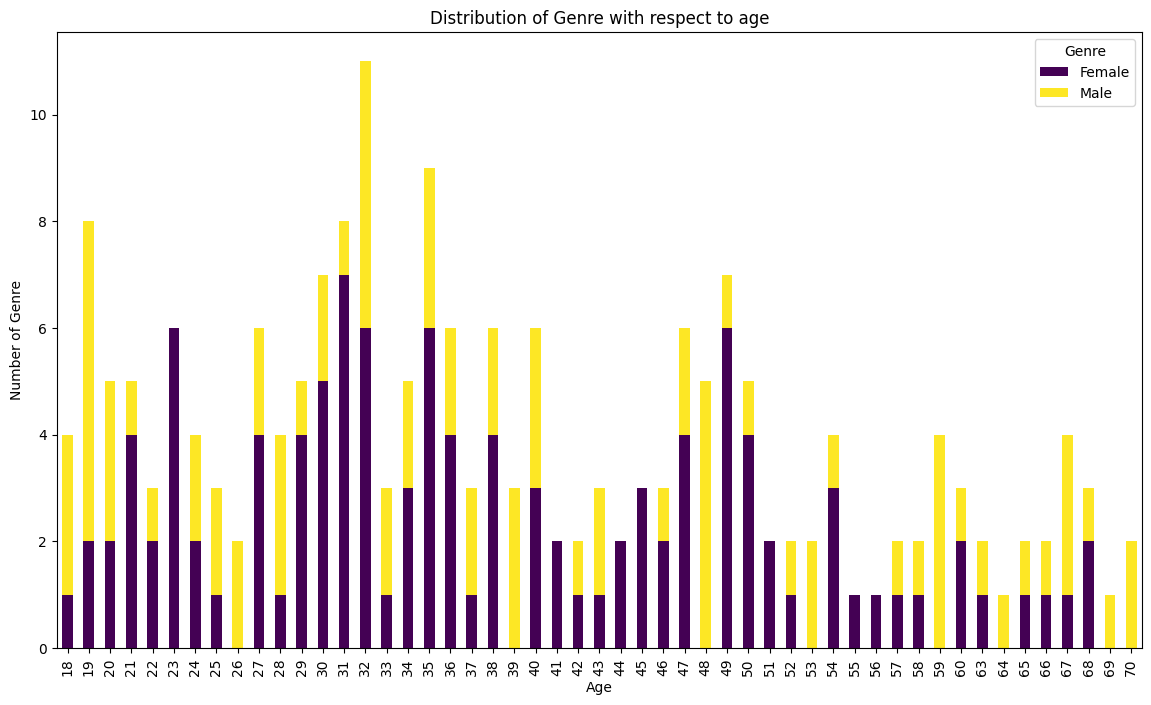

In [104]:
# Chart - 8 visualization code
# Count of Genre as per Age
content_type_counts = shopping_data.groupby(['Age', 'Genre']).size().unstack(fill_value=0)
# Stacked bar chart
content_type_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Distribution of Genre with respect to age')
plt.xlabel('Age')
plt.ylabel('Number of Genre')
plt.legend(title='Genre')
plt.show()

<Axes: >

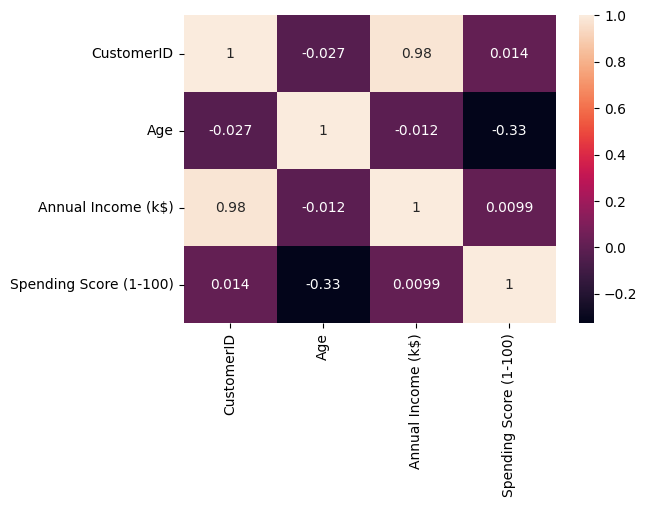

In [105]:
# Correlation Heatmap visualization code
plt.figure(figsize=(6,4))
sns.heatmap(shopping_data.corr(),annot=True)

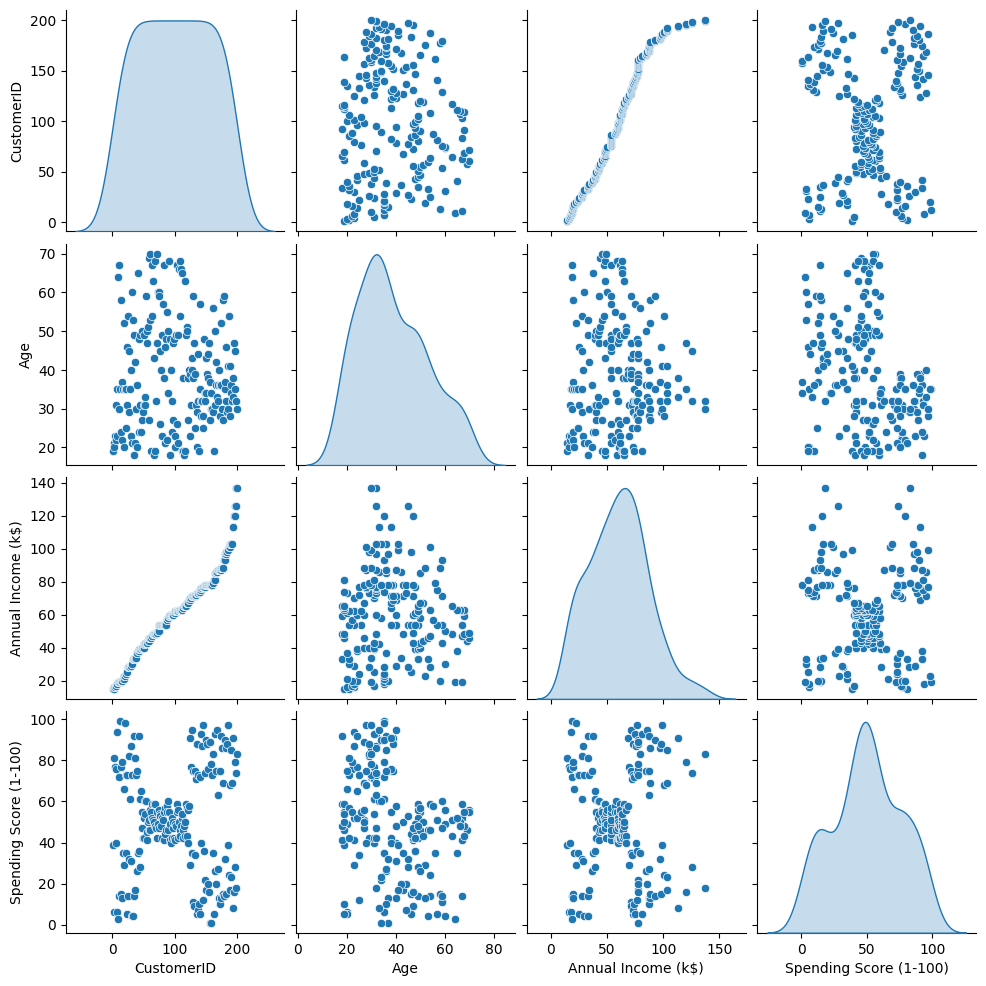

In [106]:
# Create a pair plot
sns.pairplot(shopping_data, diag_kind='kde')

In [107]:
# Due to more unique values we are dropping CustomerID
shopping_data = shopping_data.drop('CustomerID',axis=1)

In [108]:
shopping_data.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [109]:
shopping_data.skew()

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [110]:
# Calculate the IQR (Interquartile Range)
Q1 = shopping_data['Annual Income (k$)'].quantile(0.25)
Q3 = shopping_data['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
print('IQR value is', IQR)

IQR value is 36.5


In [111]:
# Define upper and lower bounds to identify outliers
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print('Lower fence is', lower_bound)
print('Upper fence is', upper_bound)

Lower fence is -13.25
Upper fence is 132.75


In [112]:
# Identify and potentially remove outliers
outliers = shopping_data[(shopping_data['Annual Income (k$)'] < lower_bound) | (shopping_data['Annual Income (k$)'] > upper_bound)]

In [113]:
# Remove outliers from the dataset
data = shopping_data[(shopping_data['Annual Income (k$)'] >= lower_bound) & (shopping_data['Annual Income (k$)'] <= upper_bound)]

Text(0.5, 1.0, 'Outliers removed in Annual Income')

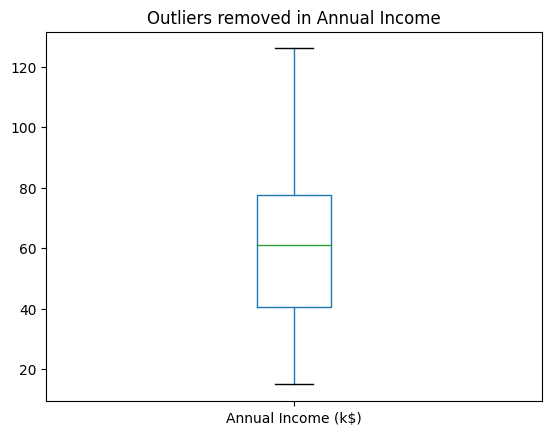

In [114]:
# Boxplot after removies outliers
data.boxplot(column =['Annual Income (k$)'], grid = False)
plt.title('Outliers removed in Annual Income')

In [115]:
shopping_data = shopping_data.drop('Genre',axis=1)

In [116]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [117]:
df = pd.DataFrame(pt.fit_transform(shopping_data))
df.columns= shopping_data.columns
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.718993,-1.989930,-0.385308
1,-1.470002,-1.989930,1.164467
2,-1.591912,-1.930366,-1.820424
3,-1.240020,-1.930366,1.023549
4,-0.461118,-1.872032,-0.346103


In [118]:
df.skew()

Age                      -0.013855
Annual Income (k$)       -0.063780
Spending Score (1-100)   -0.223377
dtype: float64

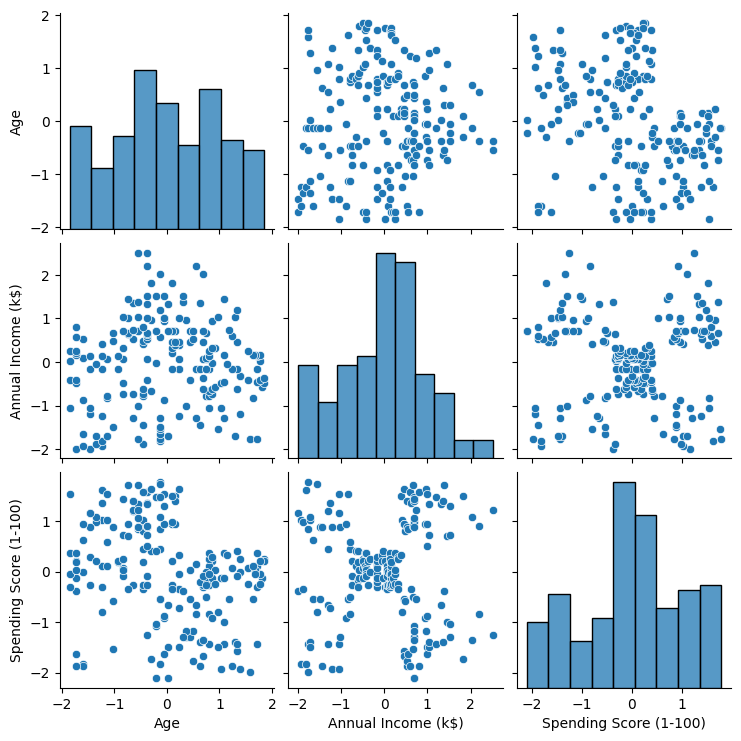

In [119]:
sns.pairplot(df ,diag_kind='hist')

-0.047220201374263374


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

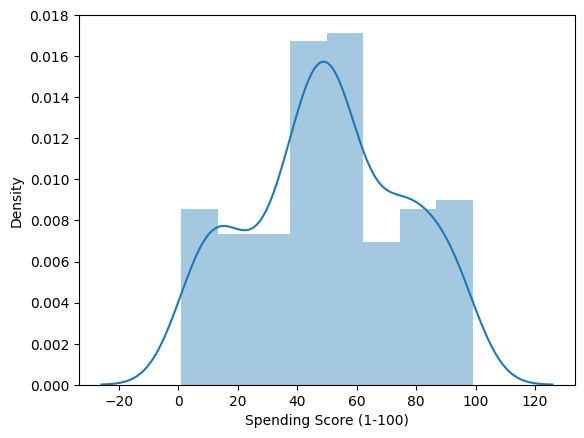

In [120]:
temp = shopping_data['Spending Score (1-100)']
print(temp.skew())
sns.distplot(temp)

-1.8066668619434074


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

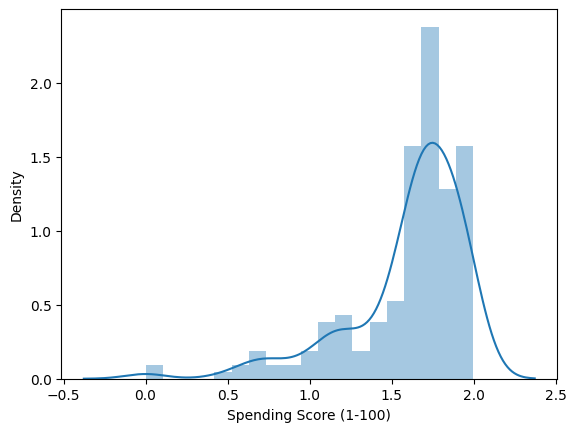

In [121]:
temp = np.log10(shopping_data['Spending Score (1-100)'])
print(temp.skew())
sns.distplot(temp)

0.3218425498619055


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

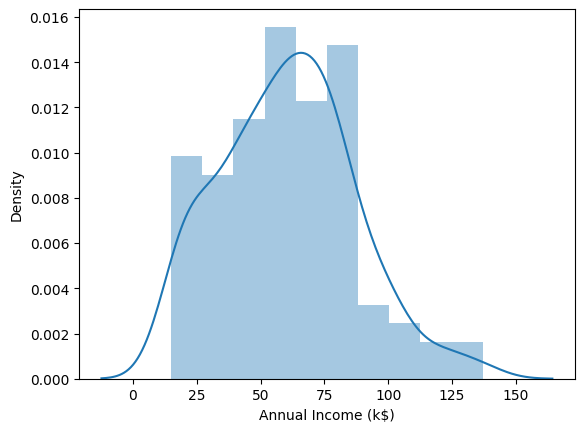

In [122]:
temp = shopping_data['Annual Income (k$)']
print(temp.skew())
sns.distplot(temp)

-0.7596281254451492


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

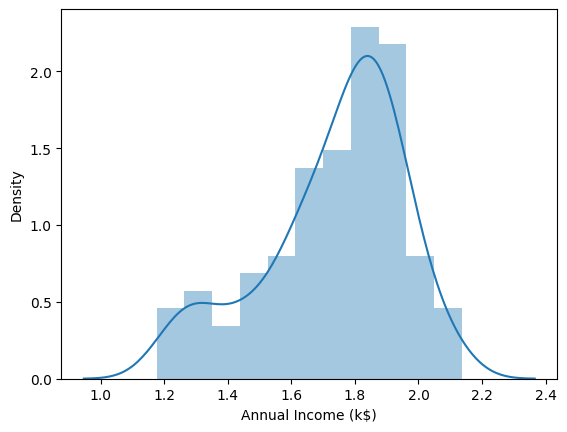

In [123]:
temp = np.log10(shopping_data['Annual Income (k$)'])
print(temp.skew())
sns.distplot(temp)

In [124]:
shopping_data = df

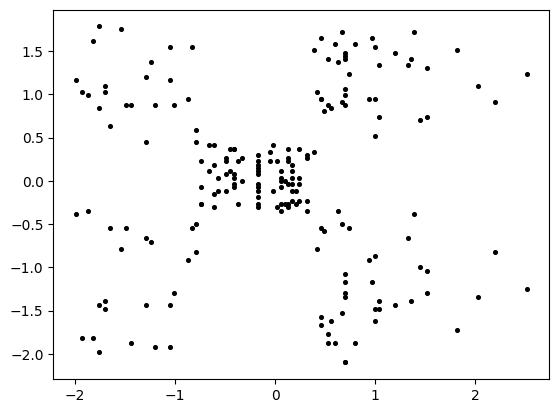

In [125]:
# Getting the values and plotting it
f1 = shopping_data['Annual Income (k$)'].values
f2 = shopping_data['Spending Score (1-100)'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [126]:
from sklearn.cluster import KMeans
# Let us check optimal number of clusters-
cluster_range = range( 1, 20)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5,max_iter=100)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,400.000000
1,2,266.892051
2,3,164.131751
3,4,114.198716
4,5,61.264301
5,6,53.930404
6,7,44.897892
7,8,37.631818
8,9,31.881193
9,10,29.453497


In [127]:
errors = clusters_df['cluster_errors']

In [128]:
for i in range(8):
    print(errors[i+1]-errors[i])

-133.10794914978624
-102.76029939446562
-49.933035012737676
-52.93441513465359
-7.333897170321961
-9.032511997139203
-7.266074211903181
-5.750624893391496


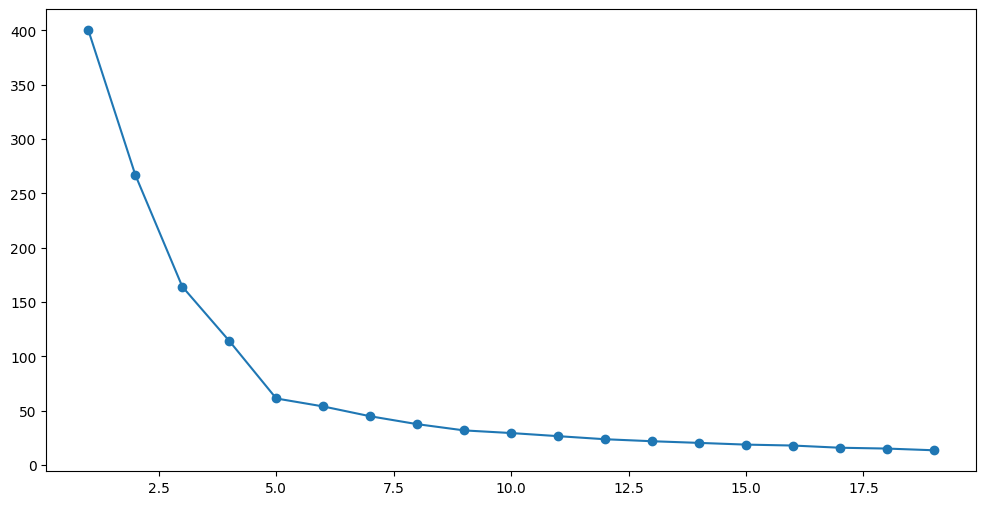

In [129]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [130]:
# Number of clusters
kmeans = KMeans(n_clusters=5)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
sklearn
[[ 0.97265491  1.20116211]
 [-0.14644306  0.00453909]
 [ 1.02744075 -1.31331303]
 [-1.42201891  1.10336507]
 [-1.45022752 -1.21572107]]


In [131]:
colnames = ["Annual Income (k$)", "Spending Score (1-100)"]
prediction= kmeans.predict(X)
#X["clusters"] = prediction
X_df = pd.DataFrame(X, columns= colnames)
X_df["group"] = prediction

In [132]:
X_df.head()

,Annual Income (k$),Spending Score (1-100),group
0,-1.989930,-0.385308,4
1,-1.989930,1.164467,3
2,-1.930366,-1.820424,4
3,-1.930366,1.023549,3
4,-1.872032,-0.346103,4


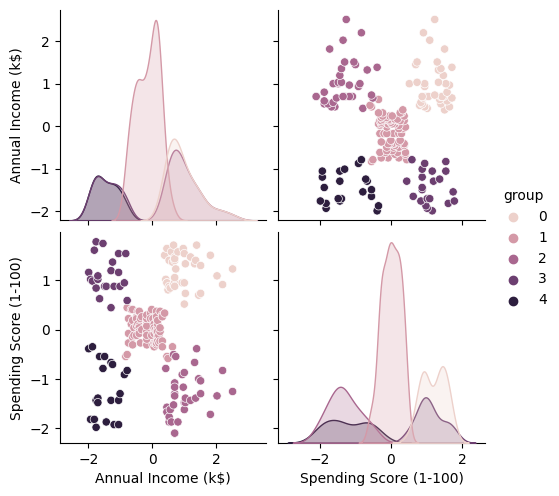

In [133]:
sns.pairplot(X_df,diag_kind='kde',hue='group')

array([[<Axes: title={'center': 'Annual Income (k$)'}, xlabel='[group]'>,
        <Axes: title={'center': 'Spending Score (1-100)'}, xlabel='[group]'>,
        <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

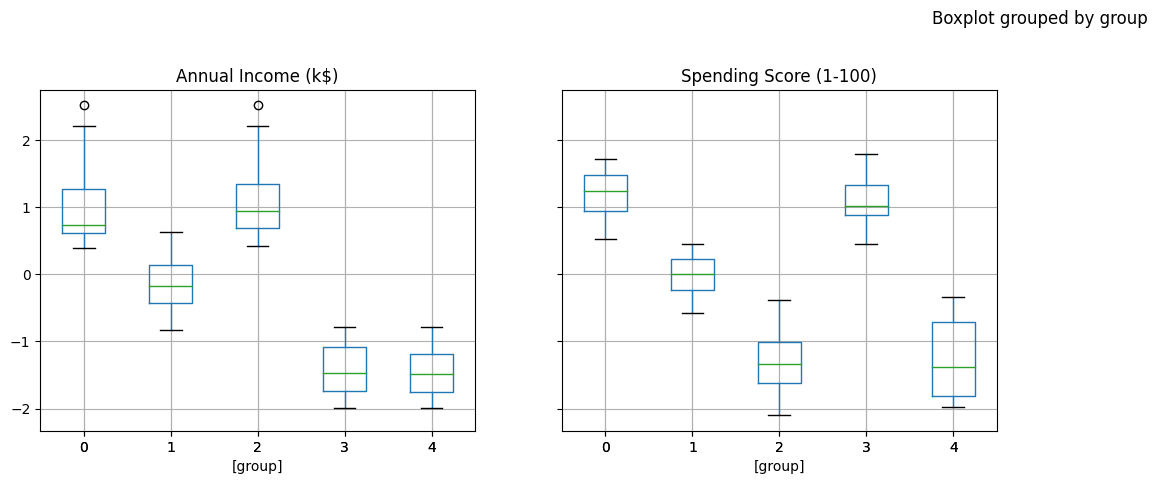

In [134]:
X_df.boxplot(by = 'group',  layout=(2,4), figsize=(25, 10))

<Axes: xlabel='group', ylabel='Annual Income (k$)'>

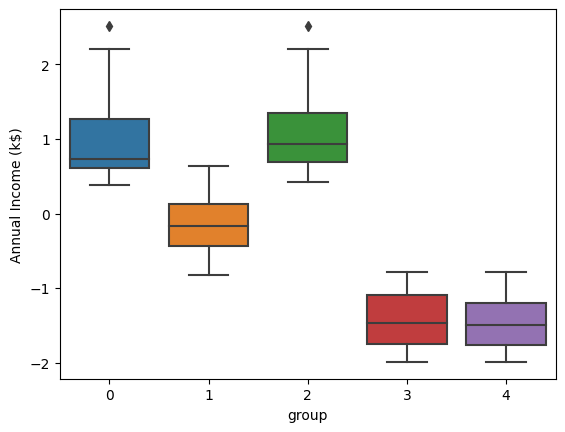

In [135]:
sns.boxplot(x='group',y='Annual Income (k$)',data=X_df)

<Axes: xlabel='group', ylabel='Spending Score (1-100)'>

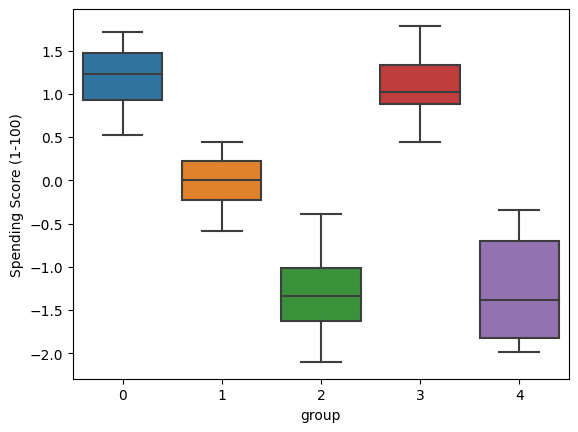

In [136]:
sns.boxplot(x='group',y='Spending Score (1-100)',data=X_df)

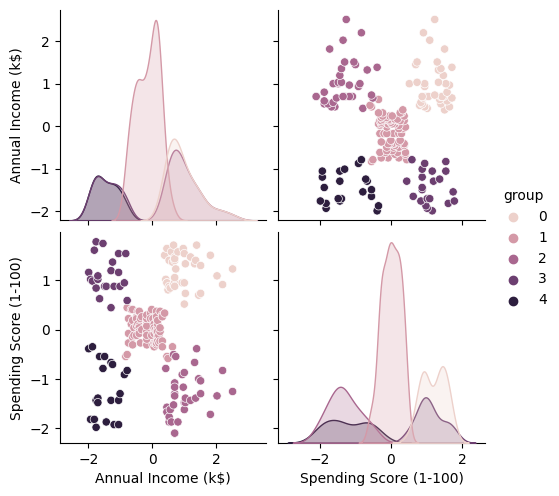

In [137]:
sns.pairplot(X_df,diag_kind='kde',hue='group')

In [138]:
for i in cluster_range:
    points = np.array(X_df.loc[X_df['group'] == i])

points

array([], shape=(0, 3), dtype=float64)

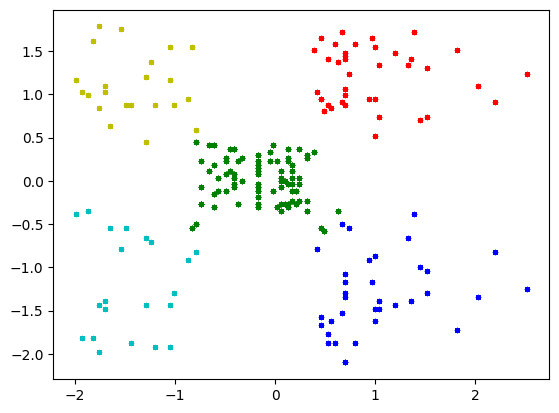

In [139]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([3,3])

for i in labels:
        points = np.array(X_df.loc[X_df['group'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.3052413406405734


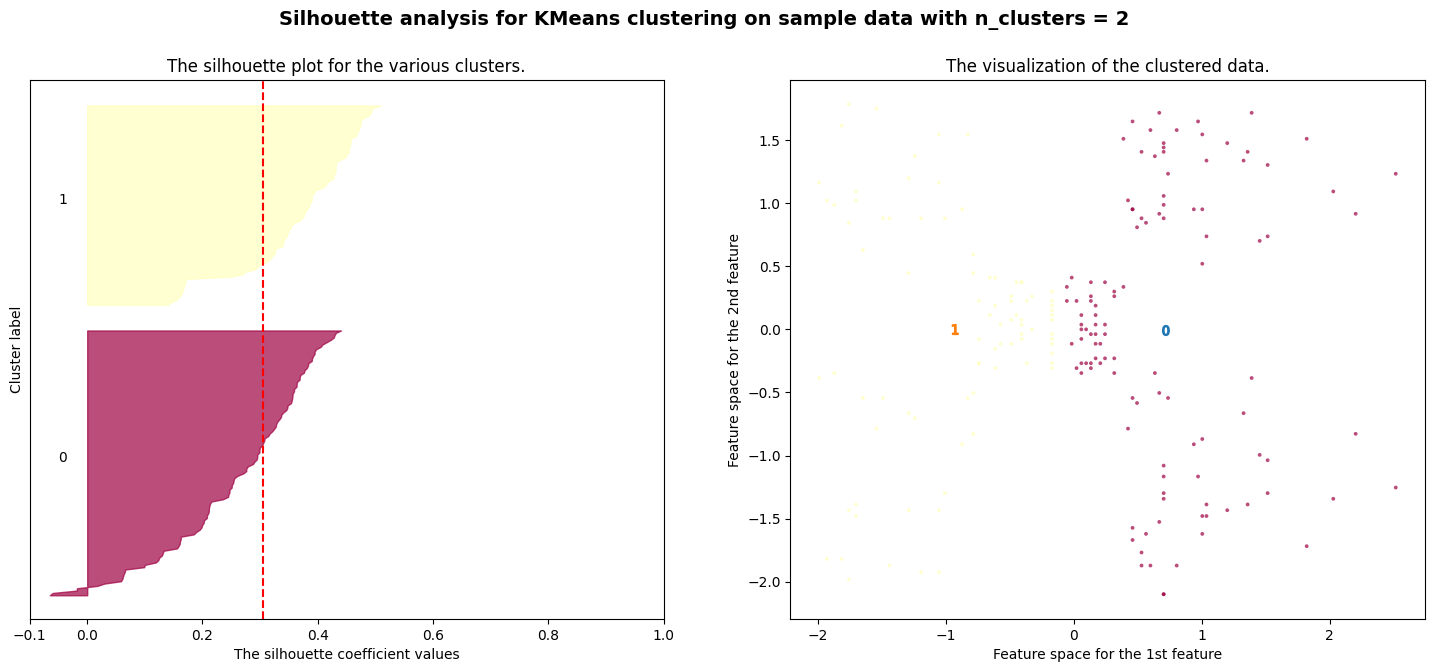

For n_clusters = 3 The average silhouette_score is : 0.4489780787371337


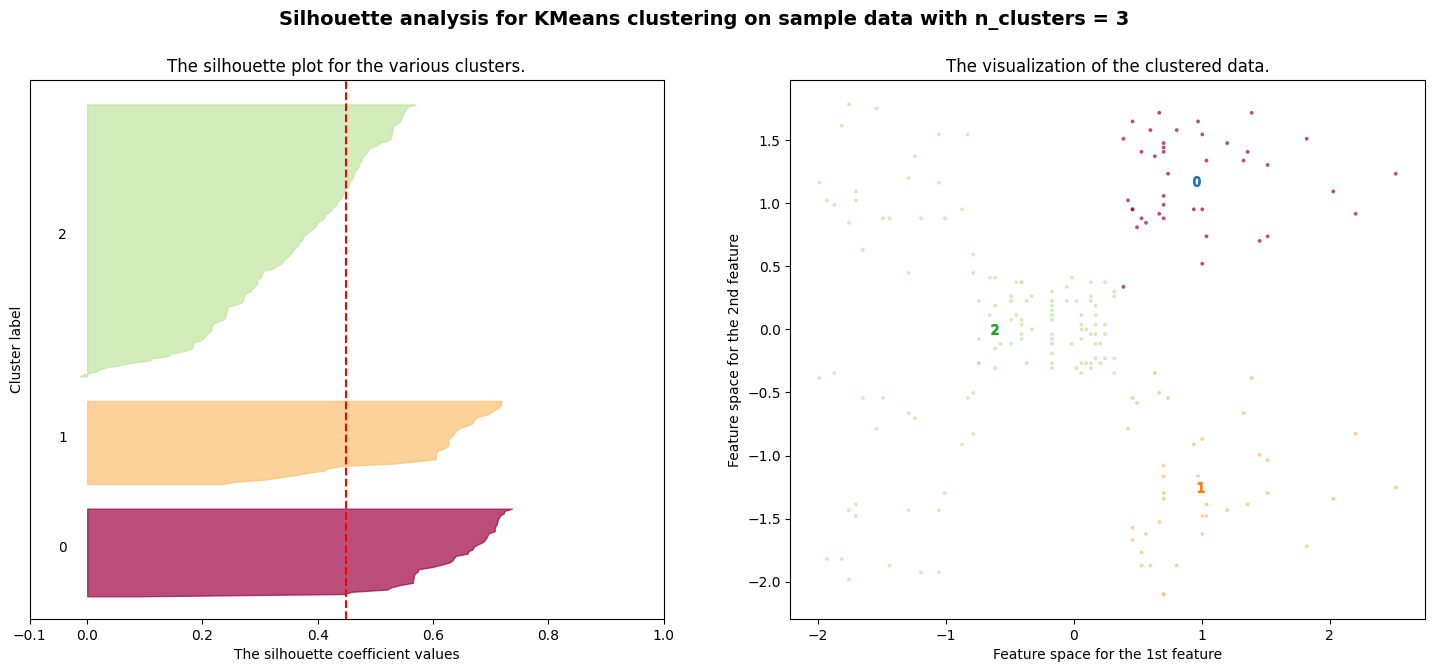

For n_clusters = 4 The average silhouette_score is : 0.4983534404879849


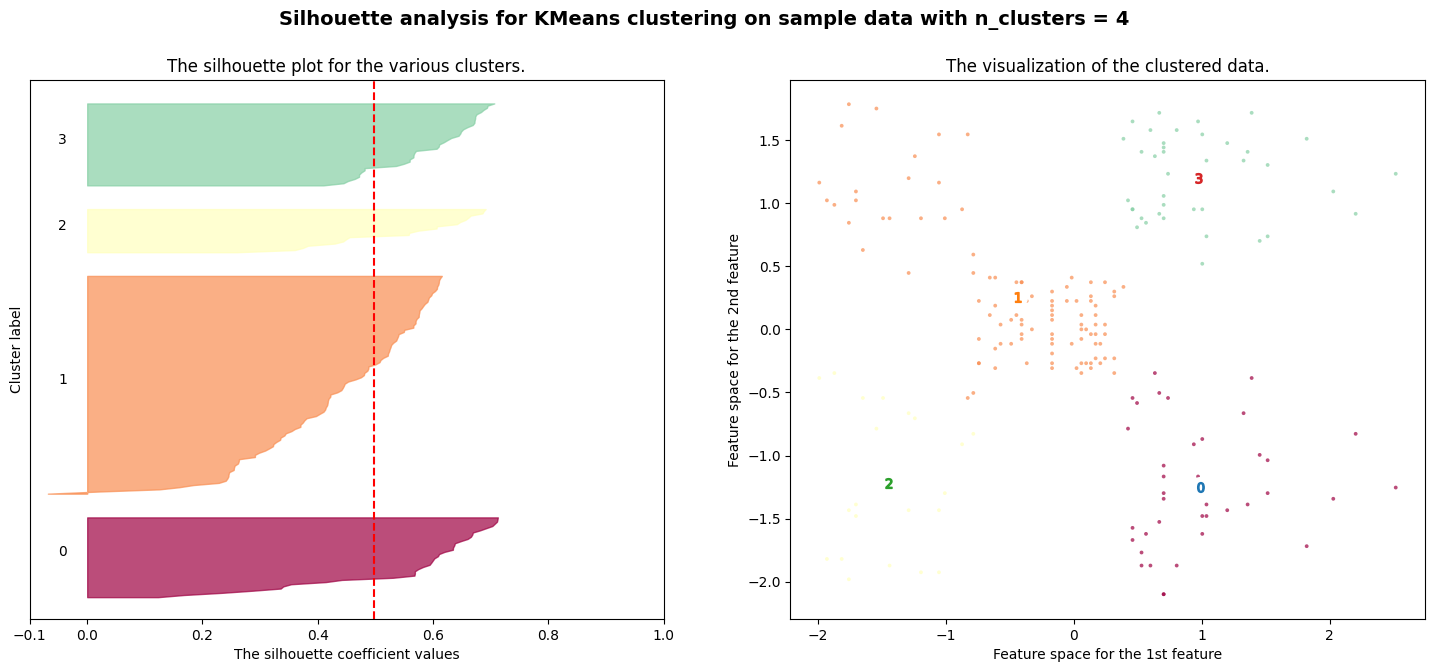

For n_clusters = 5 The average silhouette_score is : 0.5616851358179669


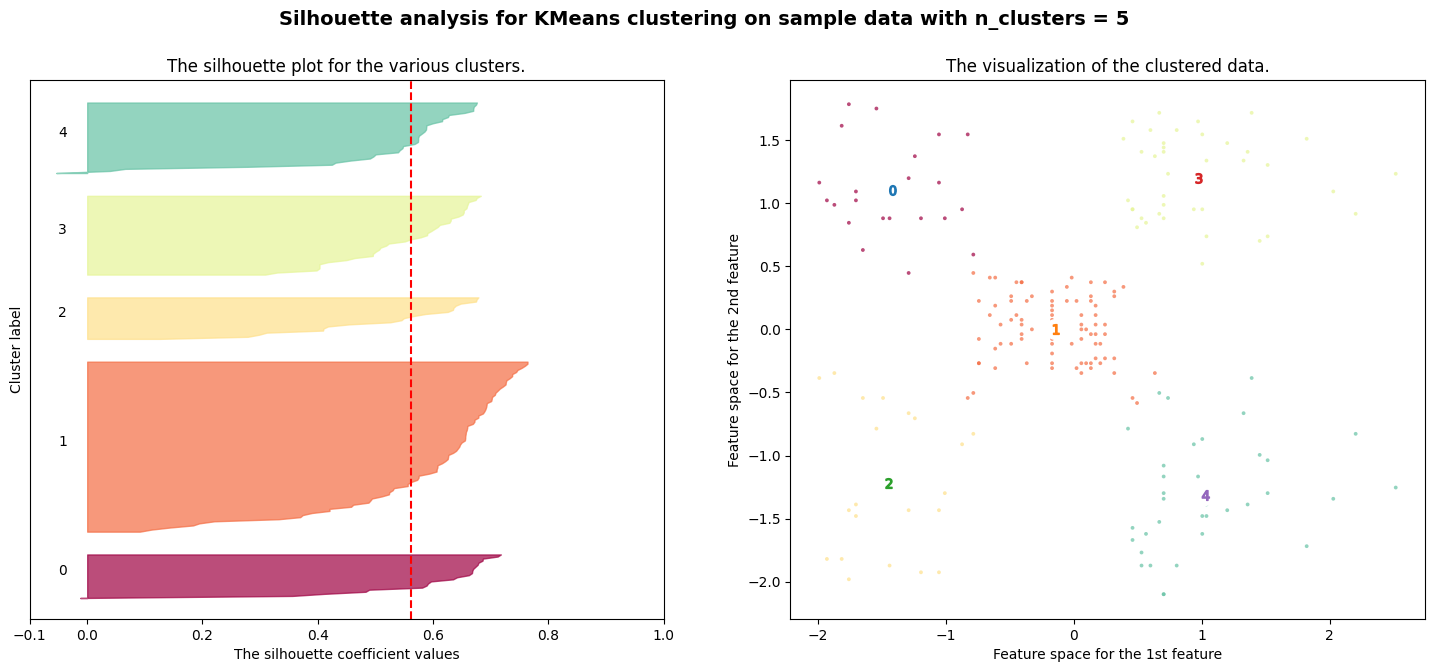

For n_clusters = 6 The average silhouette_score is : 0.46510989803197483


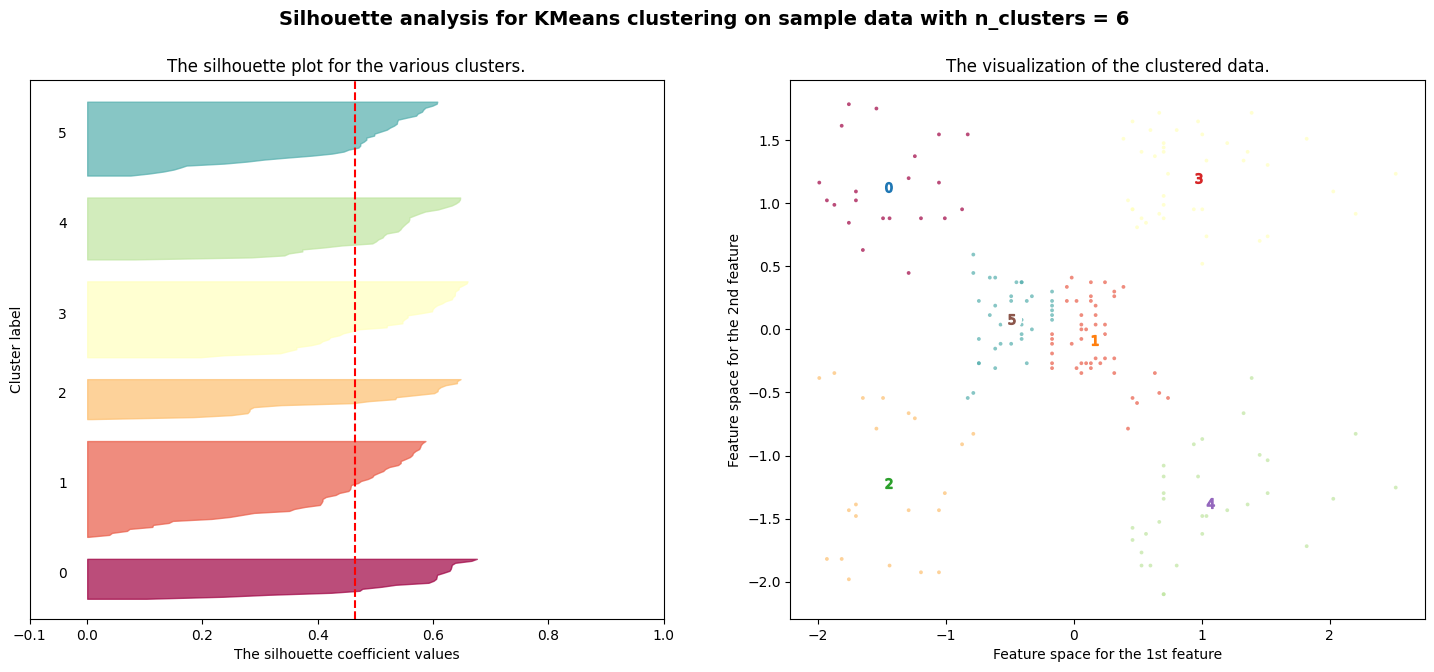

For n_clusters = 7 The average silhouette_score is : 0.45399192070710326


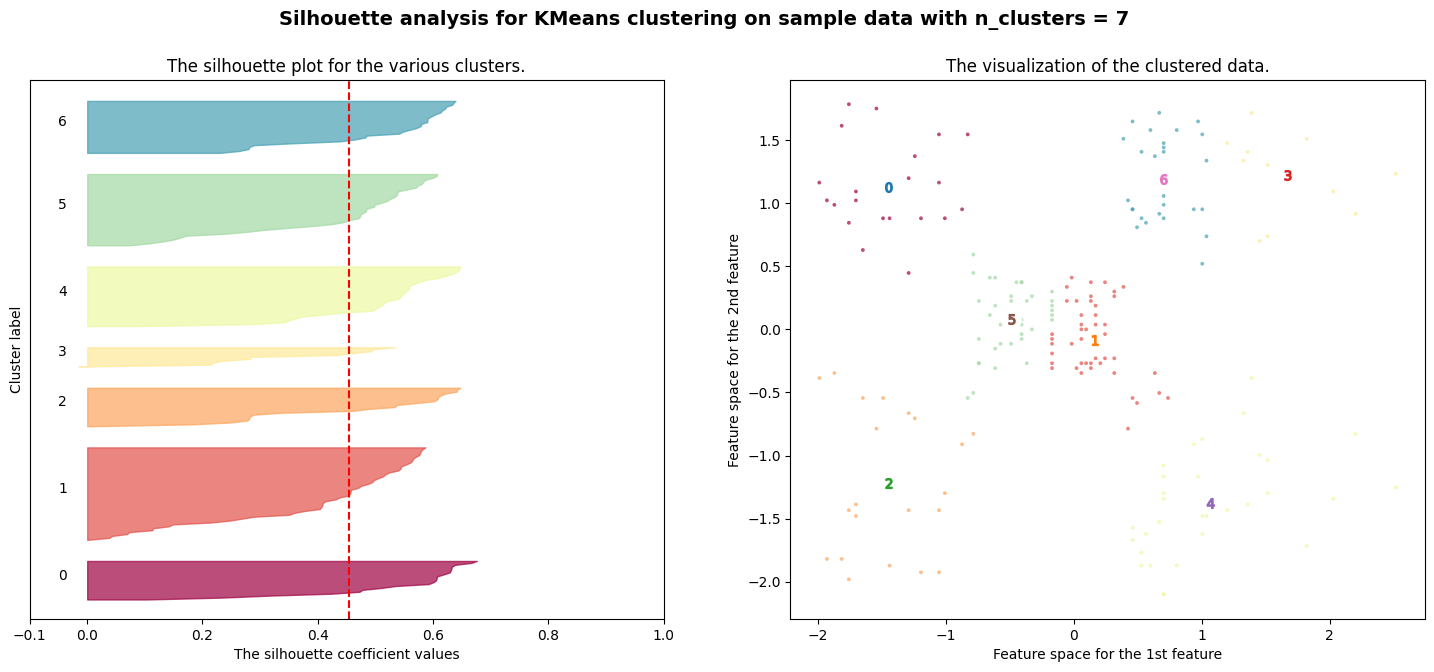

For n_clusters = 8 The average silhouette_score is : 0.4440637286097994


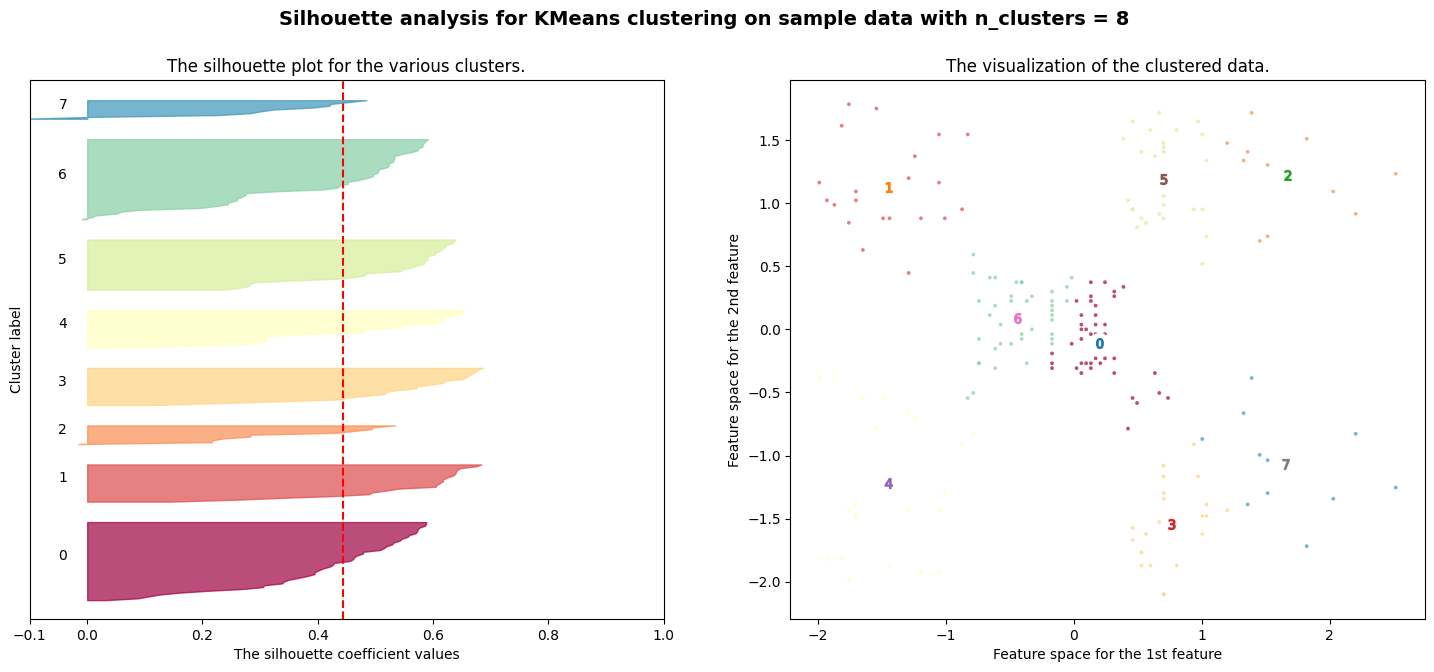

For n_clusters = 9 The average silhouette_score is : 0.44747743369354365


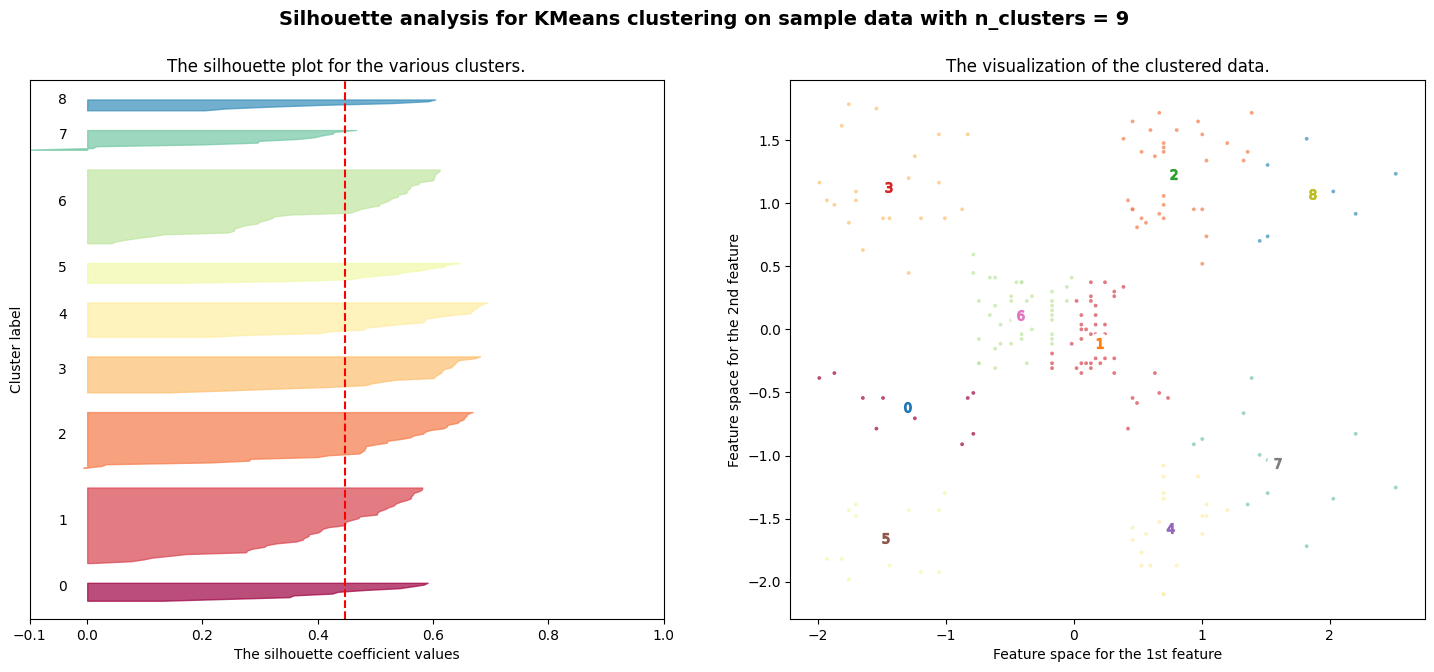

For n_clusters = 10 The average silhouette_score is : 0.45254520921968877


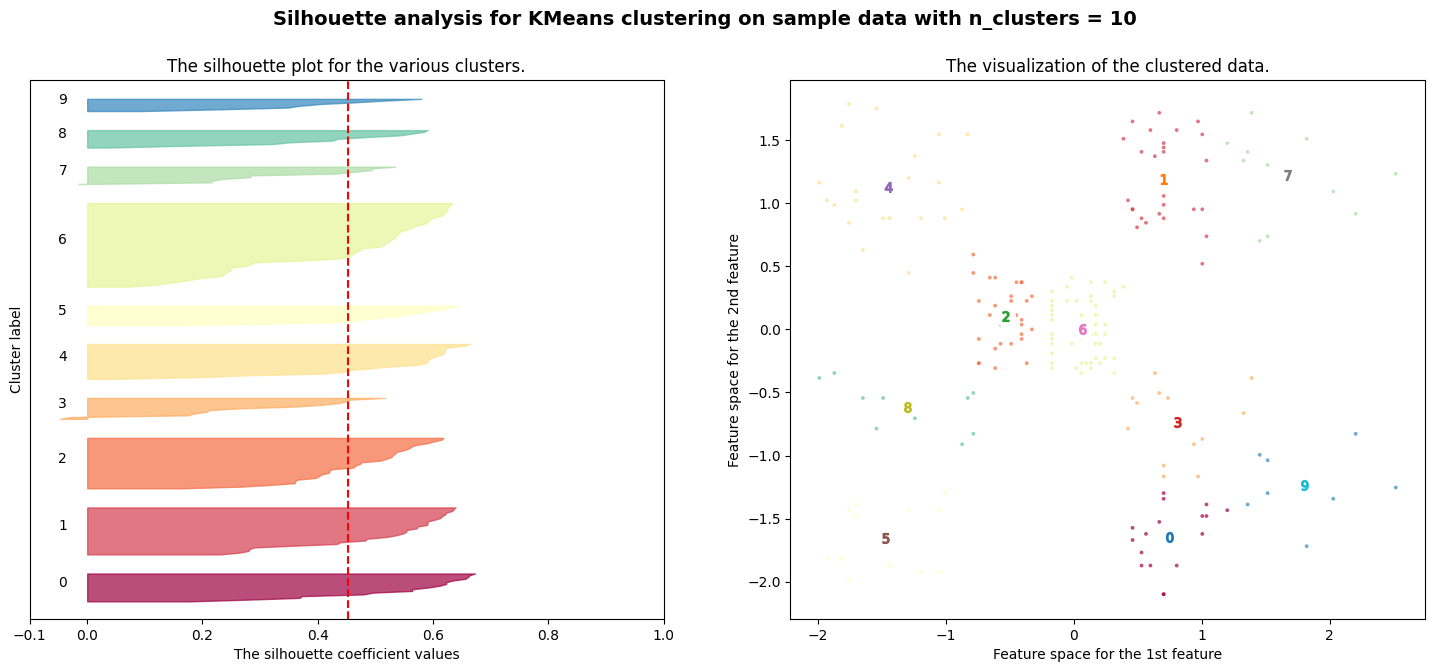

In [140]:
from __future__ import print_function
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=X_df.drop('group',axis=1).values
y=X_df['group'].values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [141]:
from sklearn.cluster import AgglomerativeClustering

In [142]:
model2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='ward')

In [143]:
model2.fit(X)

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

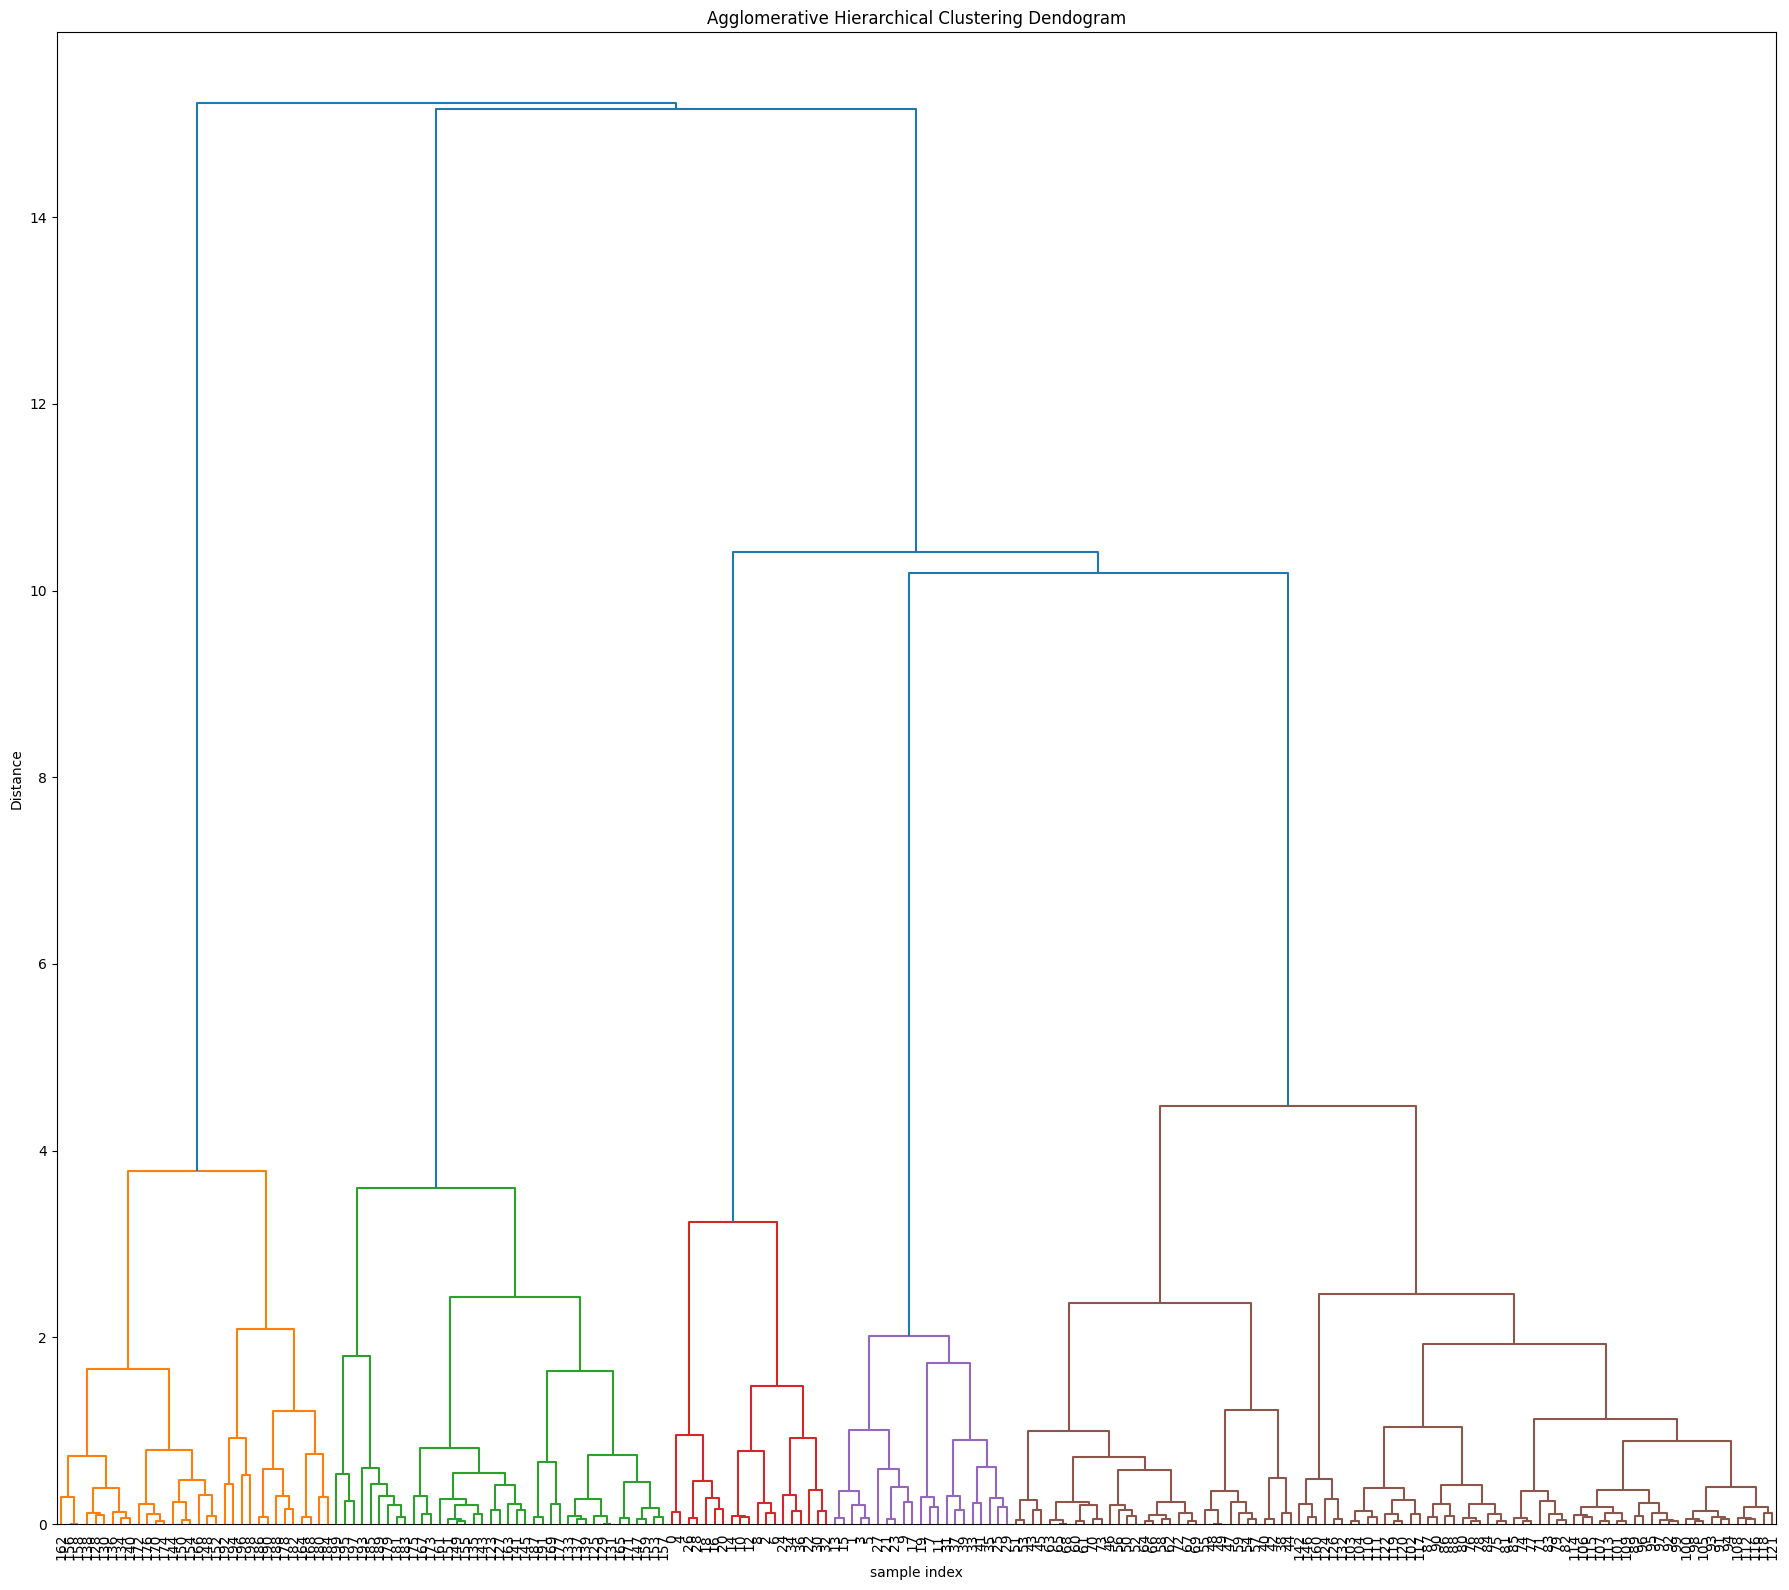

In [144]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=25,color_threshold=6,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()